In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import tensorflow as tf

tf.enable_eager_execution()

In [2]:
def binarize(x):
    return (tf.subtract(tf.multiply(tf.cast(tf.greater_equal(x, 0), dtype=tf.float32),2),1))

#### TRAIN

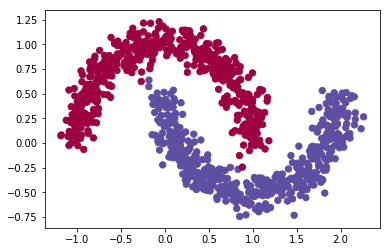

In [3]:
## Half moon 
num_samples = 1000
features, labels = sklearn.datasets.make_moons(num_samples, noise=0.10)
inputs = tf.constant(features, dtype=tf.float32)
outputs = tf.constant(labels, dtype=tf.float32)

plt.scatter(features[:,0], features[:,1], s=40, c=labels, cmap=plt.cm.Spectral)
plt.show()


In [4]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable((-5.0,7.0))
        self.b = tf.Variable(2.0)
        self.W_ = tf.Variable(0.0)
        self.b_ = tf.Variable(0.0)

    def __call__(self, x, binary = False):
        self.binarize()
        if binary:
            return self.W_ * x + self.b_
        return self.W * x + self.b
    
    def params(self):
        return self.W, self.b
    
    def binarize(self):
        self.b_ = binarize(self.b)
        self.W_ = binarize(self.W)
    

def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

model = Model()


In [ ]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs, binary=True), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)
        

In [ ]:

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs[:,1]), outputs)

    train(model, inputs[:,1], outputs, learning_rate=0.5)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')

plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()
  

In [38]:
model.W

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-150.0>